In [169]:
import autograd.numpy as np
from autograd import grad

In [170]:
def model(x, w):
    model_output = w[0] + np.dot(x.T, w[1:])
    return model_output

In [171]:
x = np.array([[1, 2], [2, 3], [3, 4]]) # nxm, transpose = 3x2, weights = 3x1
y = np.array([[2], [3]])
w = np.array([[1],[4],[5],[6]])
print(x.shape)
print(y.shape)
print(w.shape)

print(model(x, w))

(3, 2)
(2, 1)
(4, 1)
[[33]
 [48]]


[[-0.37218035 -0.63010455 -1.15072305  0.93361692 -0.83197503 -1.65698849
   1.12408201 -0.39301979 -0.73269533  0.45221453]
 [-1.17480346 -1.85639076 -2.25663055  9.9945483  -1.7108687  -2.68226569
   0.19151539 -1.24701316 -1.68401811 -0.62446651]]
(2, 10)
(10, 1)
(10, 1)


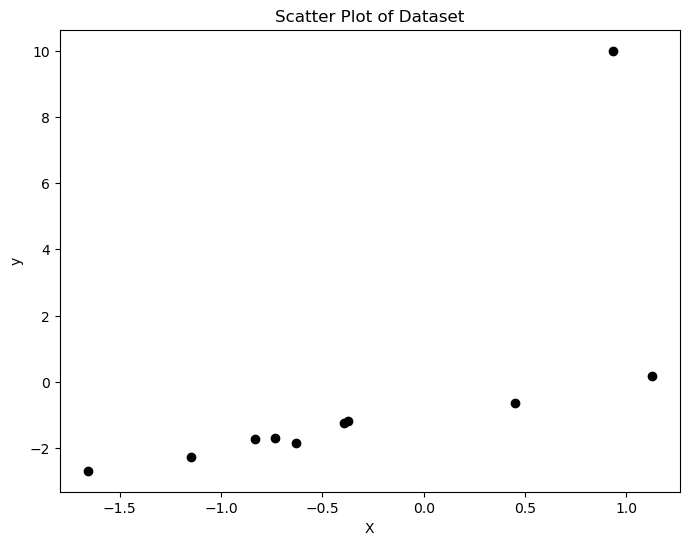

In [172]:

import matplotlib.pyplot as plt
# Load the dataset directly
data = np.loadtxt('regression_outliers.csv', delimiter=',')
print(data)
print(data.shape)
x = data[:-1,:].T
y = data[-1:,:].T
print(x.shape)
print(y.shape)
# Clear previous plots and create a new figure
plt.figure(figsize=(8, 6)) # Optional: specify figure size for better clarity
plt.scatter(x, y, color="black") # Simple scatter plot
# Add labels and title
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot of Dataset")
# Display the plot
plt.show()

In [173]:
x

array([[-0.37218035],
       [-0.63010455],
       [-1.15072305],
       [ 0.93361692],
       [-0.83197503],
       [-1.65698849],
       [ 1.12408201],
       [-0.39301979],
       [-0.73269533],
       [ 0.45221453]])

In [174]:
y

array([[-1.17480346],
       [-1.85639076],
       [-2.25663055],
       [ 9.9945483 ],
       [-1.7108687 ],
       [-2.68226569],
       [ 0.19151539],
       [-1.24701316],
       [-1.68401811],
       [-0.62446651]])

In [175]:
# so we have input x and output y
print("input shape: ", x.shape)
print("output shape: ", y.shape)

# so we have 10 input instances
# each input instance having a single feature
# so we need to learn two weights -> [w0, w1]
# as for model output we have -> model_output = w0 + (w1*input[p][0])
# model output is continous

# so, using numpy libraries

input shape:  (10, 1)
output shape:  (10, 1)


In [176]:
"""
Task 1: Create a function model(x, w) that computes a linear combination of the input point (see
slides).
"""
def model(x, w):
    # this function returns linear combination computation of the input points and weight outputs:
    # shape of x: (10, 1)
    # shape of w: (2, 1)
    # multiplication: x.T, w
    # will return a shape of y? (10, 1)

    # in the model we run for a particular instance in x or the whole dataset?

    # lets run on the whole dataset
    # model_output = w[0] + np.dot(x, w[1:])

    model_output = w[0] + np.dot(x, w[1:])
    
    return model_output



In [177]:
"""
Task 2: Create a function least squares(w) that implements the least squares cost function for linear
regression (see also slides).
"""

def least_squares(w):
    # this function calculates the cost between the predicted and observed values
    # cost = (observed-predicted)**2

    # parameters required: observed values and predicted values

    least_squares_cost = np.sum((y-model(x,w))**2)/float(y.size)

    return least_squares_cost

In [178]:
"""
Task 3: Create a function least absolute deviations(w) that implements the absolute deviations
cost function for linear regression.
"""
def least_absolute_deviations(w):
    # # this function calculates the cost between the predicted and observed values, 
    # but by taking abs(observed-predicted)

    least_absolute_deviations_cost = np.sum(abs(y-model(x,w)))/float(y.size)

    return least_absolute_deviations_cost



w=np.array([[1.0], [1.0]])
w.shape
    

(2, 1)

In [179]:
"""
Task 4
Run the gradient descent to minimize the Least Squares cost for linear regression, using initial
parameter values for w=[1.0, 1.0], max iterations = 100, and steplength alpha = 0.1.

Tip: You can use the function: optimizers.gradient descent(). The mlrefined libraries can be
found here: https://github.com/jermwatt/machine_learning_refined/tree/gh-pages
"""

from mlrefined_libraries.math_optimization_library.optimizers import gradient_descent


# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
# def gradient_descent(g,alpha_choice,max_its,w):

ls_weight_update_history, ls_cost_history = gradient_descent(least_squares, alpha_choice=0.1, max_its=100, w=w)
print(ls_cost_history)

# def gradient_descent(cost_function, w=[1.0, 1.0], max_iterations=100, steplength_alpha=0.1):
#     # here we run gradient descent, with steps:
#         # Making predictions based on current weights
#         # Calculating cost
#         # updating weights based on cost
#         # keep repeating this up till max_iterations
#     cost_history = []
#     weight_update_history = []
#     for iter in max_iterations:
#         weight_update_history.append(w)
#         iter_cost = cost_function(w)
#         cost_history.append(iter_cost)

#         # now we need to find gradient
#         # what is the cost function we are trying to parameterize -> cost_function
#         # gradient will be based on it
#         # use the tip and use the gradient descent from the library


#     return cost_history, weight_update_history




[array([10.05436205]), array([8.81254263]), array([8.07864946]), array([7.63800071]), array([7.36827621]), array([7.19941306]), array([7.09099697]), array([7.01949856]), array([6.97105365]), array([6.93736847]), array([6.91338874]), array([6.89596623]), array([6.88309095]), array([6.87344503]), array([6.86614065]), array([6.86056382]), array([6.85627951]), array([6.85297298]), array([6.85041239]), array([6.84842452]), array([6.84687848]), array([6.84567449]), array([6.84473597]), array([6.84400389]), array([6.84343255]), array([6.84298651]), array([6.84263819]), array([6.84236614]), array([6.84215362]), array([6.8419876]), array([6.84185789]), array([6.84175654]), array([6.84167735]), array([6.84161548]), array([6.84156713]), array([6.84152935]), array([6.84149983]), array([6.84147676]), array([6.84145874]), array([6.84144465]), array([6.84143365]), array([6.84142505]), array([6.84141833]), array([6.84141308]), array([6.84140897]), array([6.84140576]), array([6.84140326]), array([6.841

In [180]:
""" 
Task 5: Run the gradient descent to minimize the Least absolute deviations cost for linear regression,
using as initial parameter values for w = [1.0, 1.0], maximum iterations = 100, and steplength alpha = 0.1.
"""
# here we just do a simple call to gradient_descent function and pass referenc eto the least_absolute_deviation cost function 
# and the required parameters

lad_weight_update_history, lad_cost_history  = gradient_descent(least_absolute_deviations, alpha_choice=0.1, max_its=100, w=w)
print(lad_cost_history)

[array([2.59144829]), array([2.50118259]), array([2.41091689]), array([2.3206512]), array([2.2303855]), array([2.1401198]), array([2.04985411]), array([1.95958841]), array([1.86932271]), array([1.77905702]), array([1.68879132]), array([1.59852562]), array([1.50825993]), array([1.44173281]), array([1.40245298]), array([1.36317315]), array([1.32389332]), array([1.29257394]), array([1.28393265]), array([1.27529135]), array([1.26665006]), array([1.25800877]), array([1.24936747]), array([1.24165062]), array([1.23304304]), array([1.22440175]), array([1.21576046]), array([1.20711916]), array([1.19847787]), array([1.18983658]), array([1.18119528]), array([1.17255399]), array([1.1641639]), array([1.1586744]), array([1.15678414]), array([1.14427075]), array([1.14940438]), array([1.13533367]), array([1.13195839]), array([1.12974493]), array([1.12647178]), array([1.12415619]), array([1.12149335]), array([1.12209797]), array([1.11774123]), array([1.11471448]), array([1.11280091]), array([1.11173202

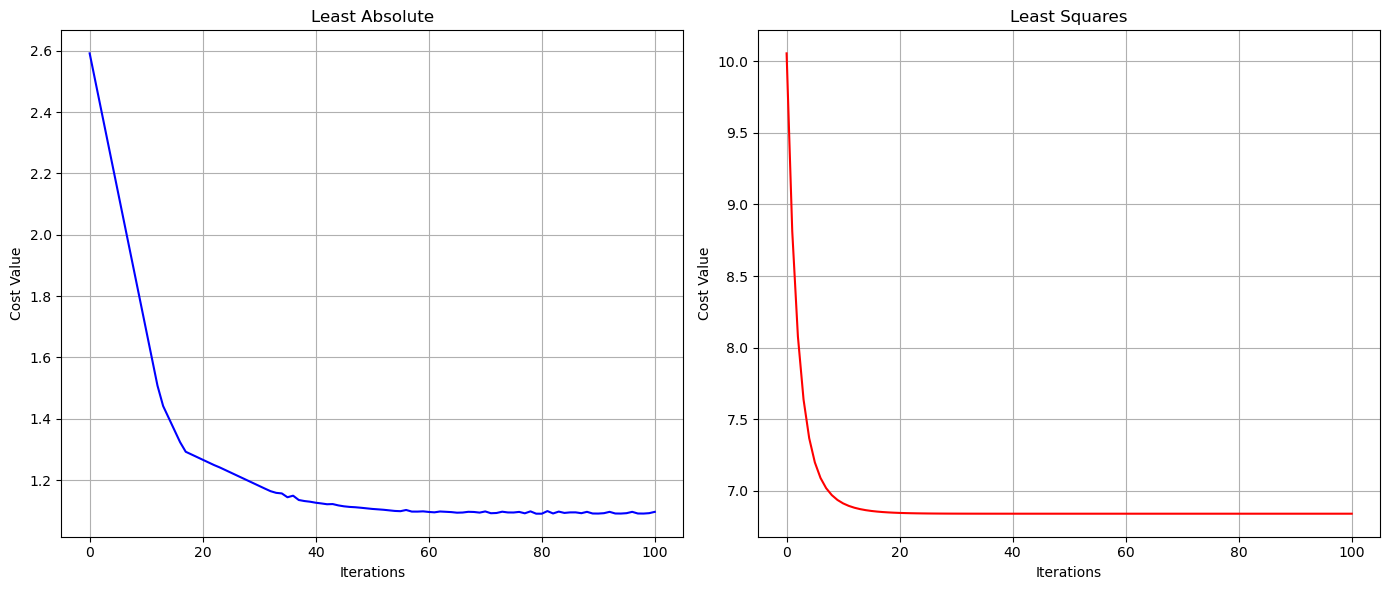

In [183]:
"""
Task 6: Plot the cost function history for both cost functions.
Tip: you can use the following function static plotter.plot cost histories()
"""

#ls_cost_history, ls_weight_update_history = gradient_descent(least_squares)

from mlrefined_libraries.math_optimization_library.static_plotter import Visualizer

visualizer = Visualizer()

import matplotlib.pyplot as plt

# Extract the values
cost_values_1 = [x[0] for x in lad_cost_history]
cost_values_2 = [x[0] for x in ls_cost_history]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot first cost function
axes[0].plot(cost_values_1, label="Cost Function 1", color='b')
axes[0].set_title("Least Absolute")
axes[0].set_xlabel("Iterations")
axes[0].set_ylabel("Cost Value")
axes[0].grid(True)

# Plot second cost function
axes[1].plot(cost_values_2, label="Cost Function 2", color='r')
axes[1].set_title("Least Squares")
axes[1].set_xlabel("Iterations")
axes[1].set_ylabel("Cost Value")
axes[1].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# then we plot the costs

In [ ]:
"""
Task 7: For the best set of parameters w found from gradient descent (for each cost function), plot the
two regression lines so that both the data points and the fitted regression models are shown in the same
plot.
Tip: you can use the following function: demo.plot fit()
"""

# best set of parameter will be? -> 
# the last set of weight update history
# need to look thru this

[[1.]
 [1.]]


In [190]:

model_output = model(x, ls_weight_update_history[-1])
print(model_output)

[[-0.43316633]
 [-1.1453309 ]
 [-2.58283088]
 [ 3.1723213 ]
 [-1.70272333]
 [-3.98070008]
 [ 3.69822187]
 [-0.49070694]
 [-1.42859829]
 [ 1.84310243]]


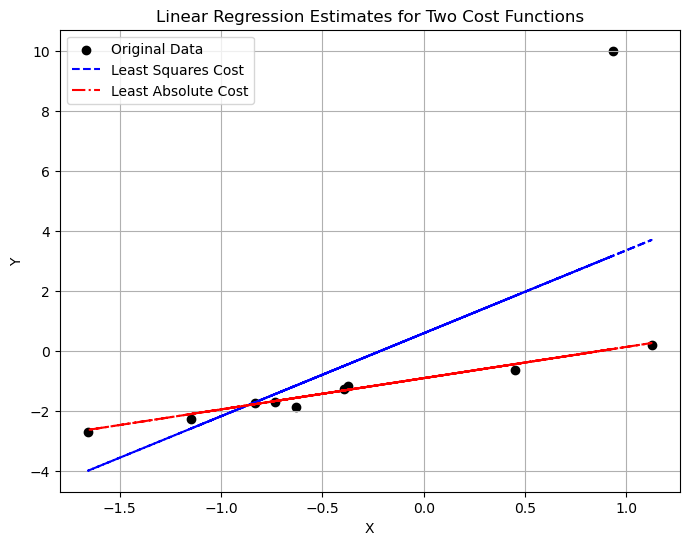

In [194]:
# Create the plot
plt.figure(figsize=(8, 6))

# Plot the original data points
plt.scatter(x, y, color='black', label='Original Data')

# Plot the linear regression estimates for both cost functions
plt.plot(x, model(x, ls_weight_update_history[-1]), label='Least Squares Cost', color='blue', linestyle='--')
plt.plot(x, model(x, lad_weight_update_history[-1]), label='Least Absolute Cost', color='red', linestyle='-.')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Estimates for Two Cost Functions')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

np.float64(10.054362045480827)

np.float64(2.591448285125982)

np.float64(1.1812966434094807)